In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn


In [2]:
# Read housing data set csv into memory
df=pd.read_csv("../data/Boston_housing_data.csv",low_memory='False')

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

 **Attribute Information:**

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [3]:
# Upper case all data frame column names
df.columns=map(str.upper, df.columns)

#check dimensions of data set
(rows,features)= df.shape
print "Number of rows in data set - ", rows
print "Number of features in data set - ",features
print df.head(2)
df.describe()

Number of rows in data set -  506
Number of features in data set -  14
      CRIM        ZN    INDUS  CHAS      NOX       RM       AGE      DIS  RAD  \
0 0.006320 18.000000 2.310000     0 0.538000 6.575000 65.200000 4.090000    1   
1 0.027310  0.000000 7.070000     0 0.469000 6.421000 78.900000 4.967100    2   

   TAX   PTRATIO          B    LSTAT      MEDV  
0  296 15.300000 396.900000 4.980000 24.000000  
1  242 17.800000 396.900000 9.140000 21.600000  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Categoric variable treatment

In [4]:
# Create dummy variables for CHAS
dummy_chas = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=True)

# Create dummy variables for RAD
dummy_rad = pd.get_dummies(df['RAD'], prefix='RAD', drop_first=True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, dummy_chas, dummy_rad], axis=1)
# Delete CHAS , RAD
df.drop(['CHAS','RAD'],axis=1, inplace=True)
df.head(2)
print df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'NOX', u'RM', u'AGE', u'DIS', u'TAX',
       u'PTRATIO', u'B', u'LSTAT', u'MEDV', u'CHAS_1', u'RAD_2', u'RAD_3',
       u'RAD_4', u'RAD_5', u'RAD_6', u'RAD_7', u'RAD_8', u'RAD_24'],
      dtype='object')


### Normalize variables

*Normalization transforms variables to have zero mean and unit standard deviation*

In [5]:
raw_data=(df-df.mean())/df.std()

In [6]:
print raw_data.head(1)

       CRIM       ZN     INDUS       NOX       RM       AGE      DIS  \
0 -0.419367 0.284548 -1.286636 -0.144075 0.413263 -0.119895 0.140075   

        TAX   PTRATIO        B    ...        MEDV    CHAS_1     RAD_2  \
0 -0.665949 -1.457558 0.440616    ...    0.159528 -0.272329 -0.222922   

      RAD_3     RAD_4     RAD_5     RAD_6     RAD_7     RAD_8    RAD_24  
0 -0.284668 -0.526525 -0.541790 -0.232507 -0.186269 -0.222922 -0.593501  

[1 rows x 21 columns]


## Build model

In [7]:
import statsmodels.formula.api as smf

** Explore Correlation between house value  and AGE**

Axes(0.125,0.125;0.775x0.755)


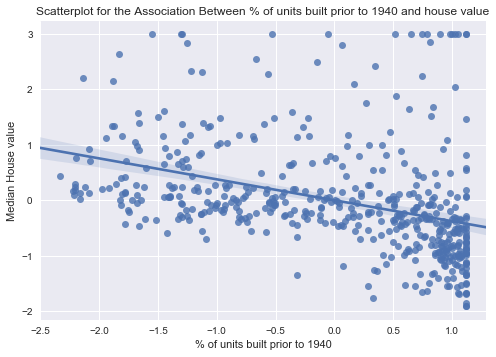

In [8]:
scat1 = seaborn.regplot(x="AGE", y="MEDV", scatter=True, data=raw_data)
plt.xlabel('% of units built prior to 1940')
plt.ylabel('Median House value')
plt.title ('Scatterplot for the Association Between % of units built prior to 1940 and house value')
print(scat1)


In [9]:
print ("OLS regression model for the association between % of units built prior to 1940 and house value")
reg1a = smf.ols('MEDV ~ AGE ', data=raw_data).fit()
print (reg1a.summary())

OLS regression model for the association between % of units built prior to 1940 and house value
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           1.57e-18
Time:                        15:18:47   Log-Likelihood:                -678.71
No. Observations:                 506   AIC:                             1361.
Df Residuals:                     504   BIC:                             1370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------

**Explore Correlation b/w number of rooms and house value **

Axes(0.125,0.125;0.775x0.755)


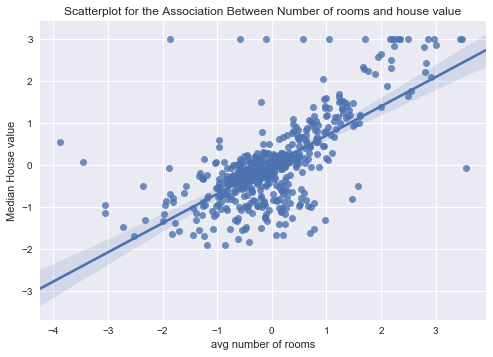

In [10]:
scat2 = seaborn.regplot(x="RM", y="MEDV", scatter=True, data=raw_data)
plt.xlabel('avg number of rooms')
plt.ylabel('Median House value')
plt.title ('Scatterplot for the Association Between Number of rooms and house value')
print(scat2)


In [11]:
print ("OLS regression model for the association between avg number of rooms and house value")
reg1b = smf.ols(' MEDV ~ RM', data=raw_data).fit()
print (reg1b.summary())


OLS regression model for the association between avg number of rooms and house value
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        15:18:48   Log-Likelihood:                -550.32
No. Observations:                 506   AIC:                             1105.
Df Residuals:                     504   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------

**Explore Correlation b/w %Lower status population and house value **

Axes(0.125,0.125;0.775x0.755)


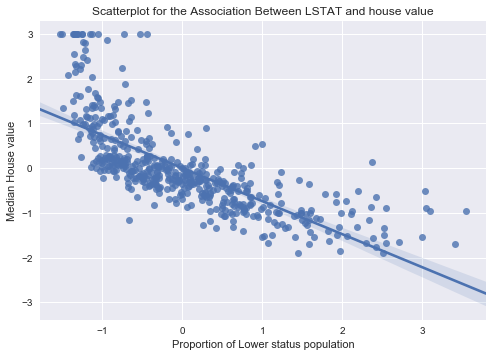

In [12]:
scat3 = seaborn.regplot(x="LSTAT", y="MEDV", scatter=True, data=raw_data)
plt.xlabel('Proportion of Lower status population')
plt.ylabel('Median House value')
plt.title ('Scatterplot for the Association Between LSTAT and house value')
print(scat3)


In [13]:
print ("OLS regression model for the association between LSTAT and house value")
reg1c = smf.ols(' MEDV ~ LSTAT', data=raw_data).fit()
print (reg1c.summary())

OLS regression model for the association between LSTAT and house value
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           5.08e-88
Time:                        15:18:48   Log-Likelihood:                -518.73
No. Observations:                 506   AIC:                             1041.
Df Residuals:                     504   BIC:                             1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

**Build Regression model for MEDV with RM, AGE and LSTAT parameters **

In [14]:
print ("OLS regression model for the association between LSTAT and house value")
reg1 = smf.ols(' MEDV ~   AGE+ RM +  LSTAT', data=raw_data).fit()
print (reg1.summary())

OLS regression model for the association between LSTAT and house value
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          1.20e-110
Time:                        15:18:48   Log-Likelihood:                -459.68
No. Observations:                 506   AIC:                             927.4
Df Residuals:                     502   BIC:                             944.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

**Explore correlation between industrial pollution parameters and house value**

In [15]:
reg2a = smf.ols(' MEDV ~ NOX', data=raw_data).fit()
print (reg2a.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           7.07e-24
Time:                        15:18:49   Log-Likelihood:                -666.47
No. Observations:                 506   AIC:                             1337.
Df Residuals:                     504   BIC:                             1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.861e-15      0.040  -7.11e-14      1.0

In [16]:
reg2b = smf.ols(' MEDV ~ INDUS', data=raw_data).fit()
print (reg2b.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     154.0
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           4.90e-31
Time:                        15:18:49   Log-Likelihood:                -650.04
No. Observations:                 506   AIC:                             1304.
Df Residuals:                     504   BIC:                             1313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.861e-15      0.039  -7.34e-14      1.0

In [17]:
reg2c = smf.ols(' MEDV ~ ZN', data=raw_data).fit()
print (reg2c.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           5.71e-17
Time:                        15:18:49   Log-Likelihood:                -682.27
No. Observations:                 506   AIC:                             1369.
Df Residuals:                     504   BIC:                             1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.861e-15      0.042  -6.89e-14      1.0

In [18]:
reg2 = smf.ols(' MEDV ~ INDUS +NOX +ZN', data=raw_data).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     56.70
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           1.41e-31
Time:                        15:18:49   Log-Likelihood:                -643.66
No. Observations:                 506   AIC:                             1295.
Df Residuals:                     502   BIC:                             1312.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.861e-15      0.039  -7.42e-14      1.0

**Build Regression model with all parameters**

In [19]:
reg3a = smf.ols(' MEDV ~ RM + LSTAT + PTRATIO + DIS +CRIM +ZN +  NOX + INDUS +AGE +CHAS_1 + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7 + RAD_8 + RAD_24 + B + TAX', data=raw_data).fit()
print (reg3a.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          8.29e-132
Time:                        15:18:49   Log-Likelihood:                -366.88
No. Observations:                 506   AIC:                             775.8
Df Residuals:                     485   BIC:                             864.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.717e-15      0.023  -7.57e-14      1.0

**Residual plot**

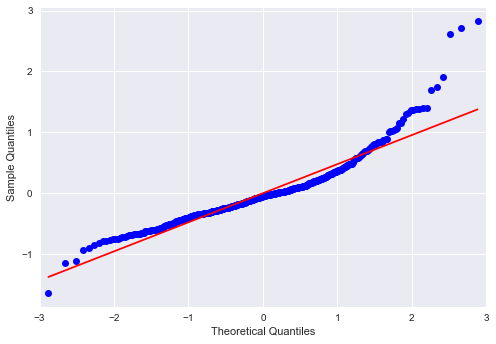

In [20]:
#Q-Q plot for normality
fig=sm.qqplot(reg3a.resid, line='r')

**Adding nonlinearity for RM feature**

In [21]:
import numpy as np
import math
raw_data['AGE'].head(5)
raw_data['AGE_L']=np.log(-2.5*raw_data['AGE']-2)


C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log


In [22]:
reg3 = smf.ols(' MEDV ~ RM + LSTAT + PTRATIO + DIS +CRIM +ZN +  NOX + INDUS +AGE_L +CHAS_1 + RAD_2 + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7 + RAD_8 + RAD_24 + B + TAX', data=raw_data).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     65.12
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           3.25e-52
Time:                        15:18:49   Log-Likelihood:                 11.713
No. Observations:                 133   AIC:                             18.57
Df Residuals:                     112   BIC:                             79.27
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2566      0.274      4.593      0.0

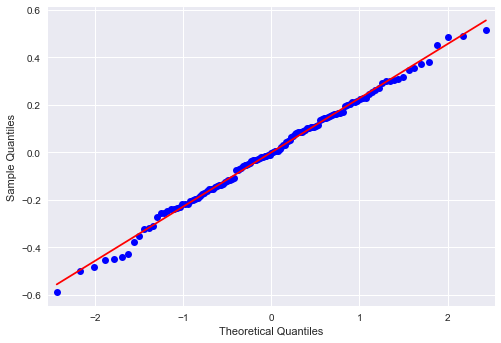

In [23]:
#Q-Q plot for normality
fig=sm.qqplot(reg3.resid, line='r')

In [24]:
print reg3.params

Intercept    1.256605
RM           0.907646
LSTAT        0.159365
PTRATIO     -0.039649
DIS         -0.173941
CRIM         2.172472
ZN           0.083907
NOX          0.140337
INDUS       -0.032329
AGE_L        0.061450
CHAS_1       0.057379
RAD_2       -0.001931
RAD_3        0.052909
RAD_4        0.068802
RAD_5        0.051125
RAD_6       -0.002829
RAD_7       -0.000124
RAD_8        0.051770
RAD_24      -0.084853
B            0.109289
TAX         -0.093147
dtype: float64


**Residula Plot**

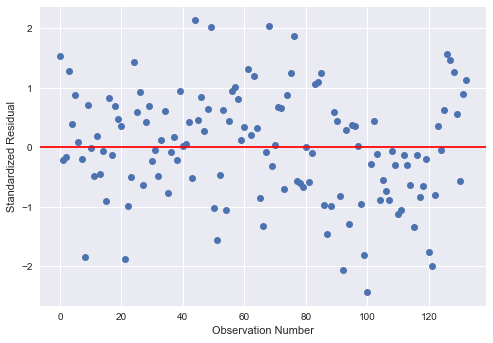

In [25]:

# simple plot of residuals
stdres=pd.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


**Rebuild model removing unnecessary variables**

In [38]:
reg4 = smf.ols(' MEDV ~ RM +   LSTAT + DIS +CRIM +ZN + AGE_L  + RAD_3 + RAD_4 + RAD_5 + RAD_6 + RAD_7 + RAD_8 + RAD_24  ', data=raw_data).fit()
print (reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     98.27
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           3.82e-57
Time:                        15:35:59   Log-Likelihood:                 6.8339
No. Observations:                 133   AIC:                             14.33
Df Residuals:                     119   BIC:                             54.80
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2543      0.266      4.722      0.0

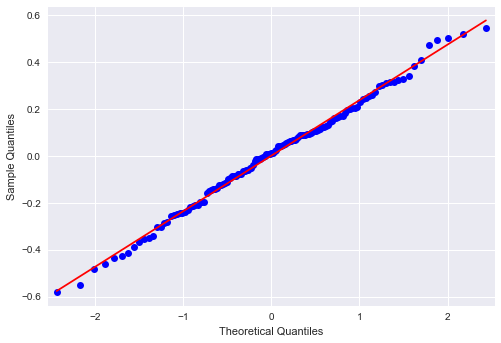

In [33]:
#Q-Q plot for normality
fig=sm.qqplot(reg4.resid, line='r')

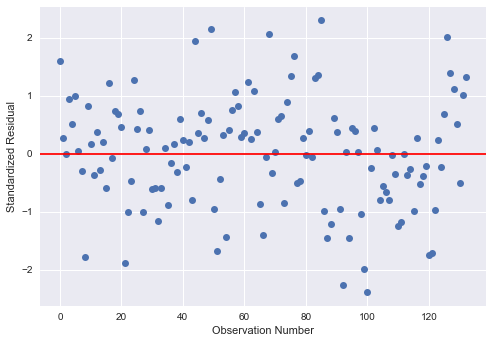

In [39]:

# simple plot of residuals
stdres=pd.DataFrame(reg4.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


Figure(576x396)


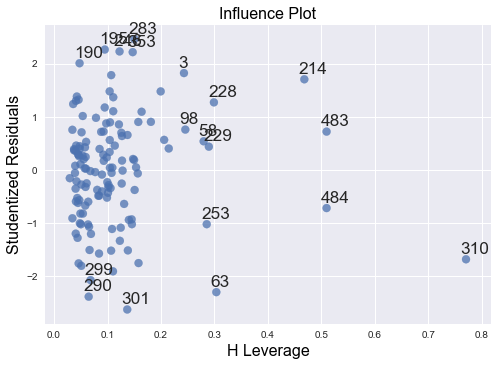

In [35]:
# leverage plot
fig3=sm.graphics.influence_plot(reg4, size=8)
print(fig3)



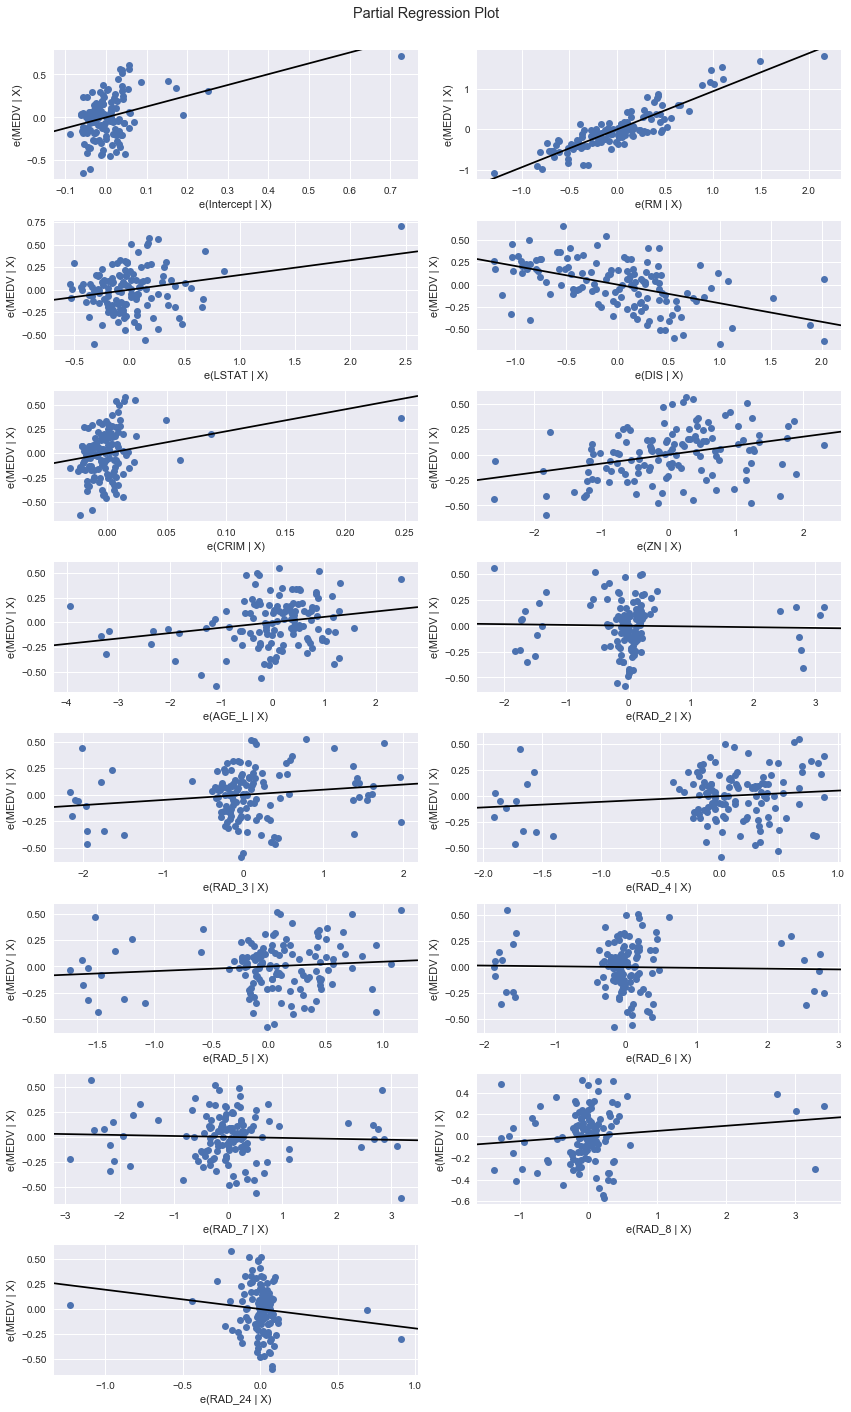

In [34]:
fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_partregress_grid(reg4, fig=fig)